In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display options
pd.set_option('display.float_format', '{:.2f}'.format)

# visual style for our plots
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('Fraud.csv')
display(df.head())

# summary of the dataframe
print("\nDataset Information:")
df.info()

# statistical summary of the numerical columns
print("\nStatistical Summary:")
display(df.describe())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

Statistical Summary:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [3]:
# Checking for missing values in the dataset
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


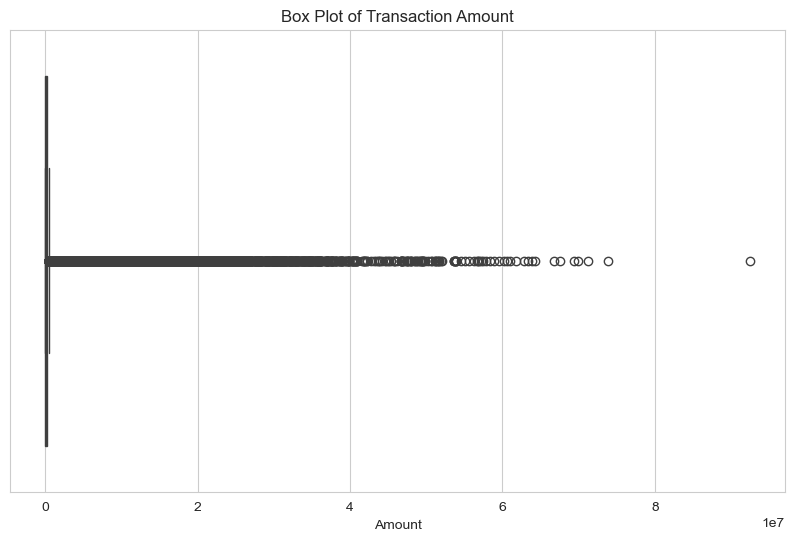

In [4]:
# Visualize the 'amount' column to spot outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['amount'])
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Amount')
plt.show()


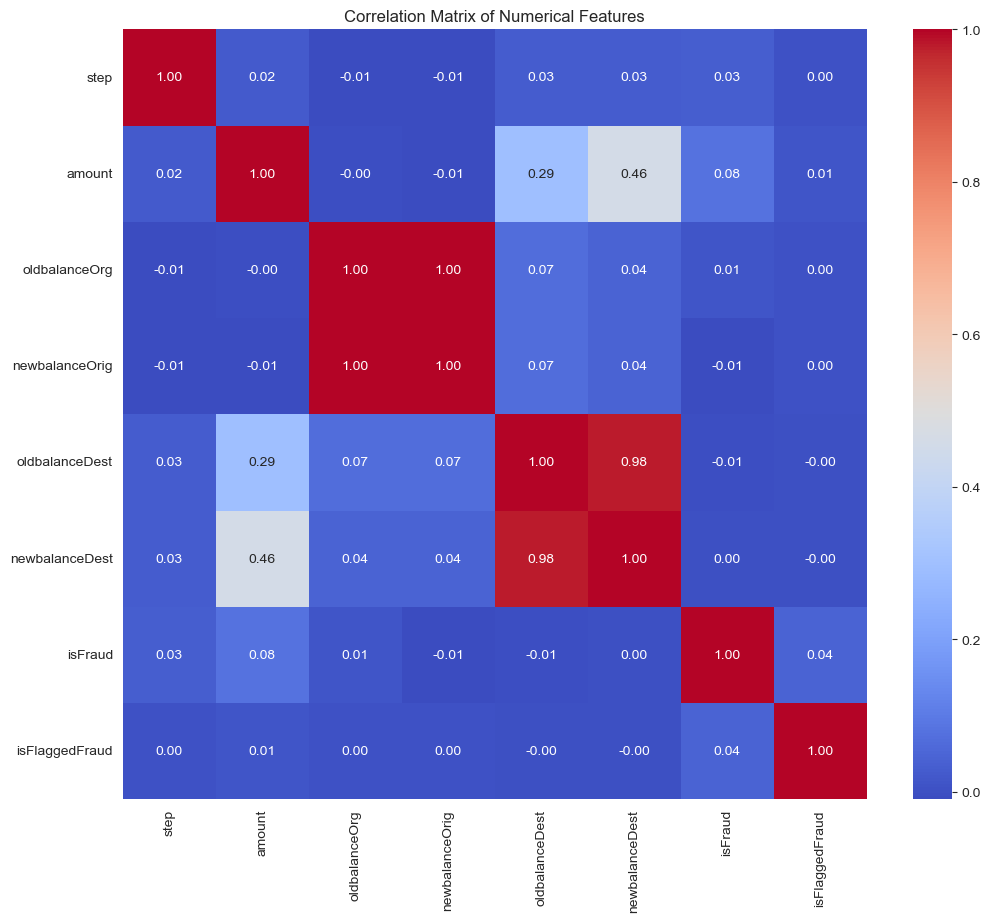

In [5]:
# numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=np.number)

# Calculate the matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Fraudulent transaction counts:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Fraudulent transaction percentage:
isFraud
0   99.87
1    0.13
Name: count, dtype: float64


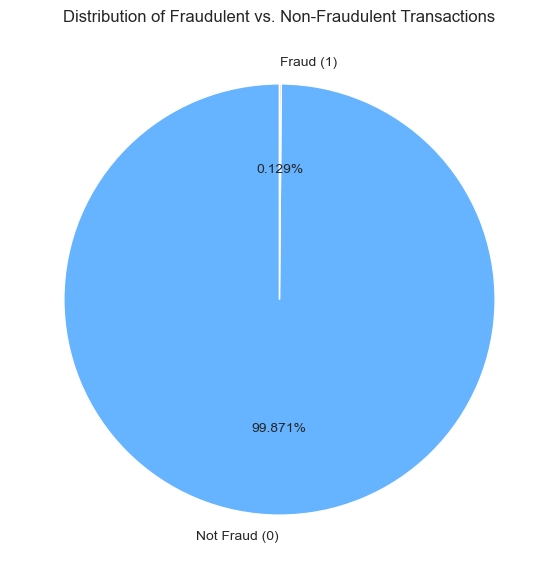

In [6]:
#distribution of the 'isFraud' column
fraud_counts = df['isFraud'].value_counts()
fraud_percentage = fraud_counts / len(df) * 100

print(f"Fraudulent transaction counts:\n{fraud_counts}")
print(f"\nFraudulent transaction percentage:\n{fraud_percentage}")

# Visualize the imbalance with a pie chart
plt.figure(figsize=(7, 7))
plt.pie(fraud_counts, labels=['Not Fraud (0)', 'Fraud (1)'], autopct='%1.3f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('') 
plt.show()

In [7]:
from sklearn.model_selection import train_test_split 
print("Creating new 'errorBalance' features...")
df['errorBalanceOrig'] = df['oldbalanceOrg'] + df['amount'] - df['newbalanceOrig']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']
print("Applying one-hot encoding to the 'type' column...")
df['type'] = df['type'].astype('category')
df = pd.get_dummies(df, columns=['type'], prefix='type', drop_first=False)
print("Dropping unnecessary columns...")
X = df.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)

#target variable is 'isFraud'.
y = df['isFraud']

# Display the first few rows of set (X)
print("\nFirst 5 rows of the final feature set (X):")
display(X.head())

# features and target
print(f"\nShape of our feature set X: {X.shape}")
print(f"Shape of our target vector y: {y.shape}")

Creating new 'errorBalance' features...
Applying one-hot encoding to the 'type' column...
Dropping unnecessary columns...

First 5 rows of the final feature set (X):


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,19679.28,9839.64,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,3728.56,1864.28,False,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,362.00,181.00,False,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,362.00,21363.00,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,23336.28,11668.14,False,False,False,True,False



Shape of our feature set X: (6362620, 13)
Shape of our target vector y: (6362620,)


In [8]:
!pip install xgboost

Original training set shape: (5090096, 13)
Original test set shape: (1272524, 13)

Applying SMOTE to the training data...
Resampled training set shape: (10167052, 13)
Notice the number of rows has increased to balance the classes.

--- Training Logistic Regression Model ---

Logistic Regression Performance:
               precision    recall  f1-score   support

Not Fraud (0)       1.00      0.96      0.98   1270881
    Fraud (1)       0.03      0.93      0.06      1643

     accuracy                           0.96   1272524
    macro avg       0.51      0.94      0.52   1272524
 weighted avg       1.00      0.96      0.98   1272524

AUC-ROC Score: 0.9446


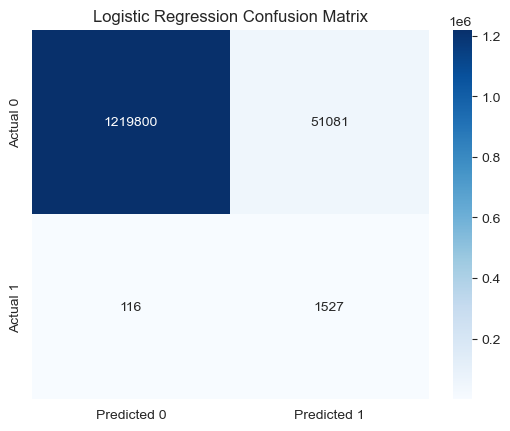


--- Training XGBoost Model ---


C:\Users\kaleo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:00:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Performance:
               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00   1270881
    Fraud (1)       0.39      0.98      0.56      1643

     accuracy                           1.00   1272524
    macro avg       0.70      0.99      0.78   1272524
 weighted avg       1.00      1.00      1.00   1272524

AUC-ROC Score: 0.9911


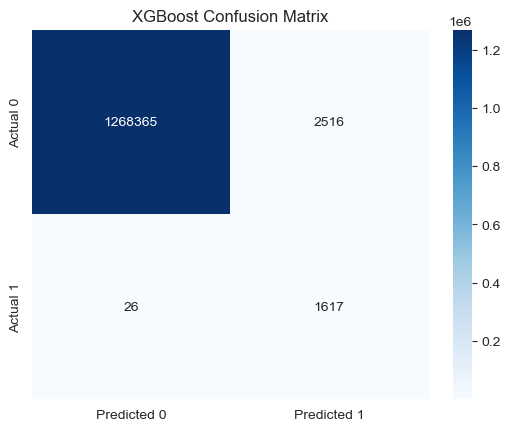

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Original training set shape: {X_train.shape}")
print(f"Original test set shape: {X_test.shape}")

# Handle Imbalance with SMOTE ---
# SMOTE is applied ONLY to the training data. 
print("\nApplying SMOTE to the training data...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Resampled training set shape: {X_train_resampled.shape}")
print("Notice the number of rows has increased to balance the classes.")

# Train and Evaluate Baseline Model 
print("\n--- Training Logistic Regression Model ---")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# predictions on the original test set
y_pred_lr = lr_model.predict(X_test)

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr, target_names=['Not Fraud (0)', 'Fraud (1)']))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_lr):.4f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Train and Evaluate Advanced Model
print("\n--- Training XGBoost Model ---")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# predictions on the original test set
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb, target_names=['Not Fraud (0)', 'Fraud (1)']))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_xgb):.4f}")

# Plot Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('XGBoost Confusion Matrix')
plt.show()

Top 10 most important features for predicting fraud:


,feature,importance
12,type_TRANSFER,0.37
6,errorBalanceOrig,0.30
3,newbalanceOrig,0.08
11,type_PAYMENT,0.07
2,oldbalanceOrg,0.05
9,type_CASH_OUT,0.04
7,errorBalanceDest,0.03
5,newbalanceDest,0.02
1,amount,0.02
0,step,0.01


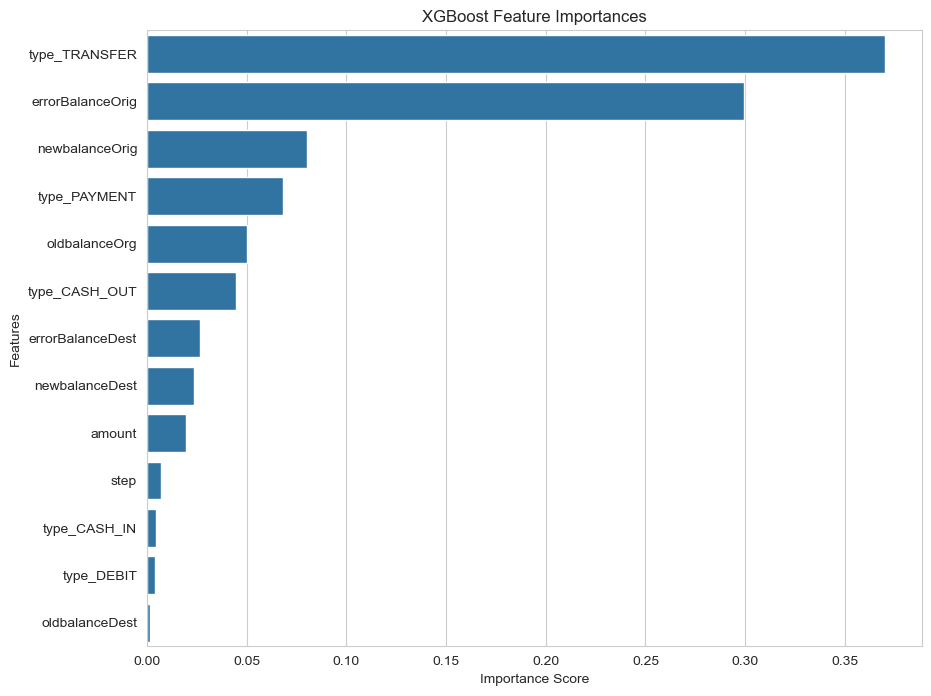

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# dataframe of feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# top 10 most important features
print("Top 10 most important features for predicting fraud:")
display(feature_importances.head(10))

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()